# Petrol Pipeline Anamoly Detection

<br><br>

### Problem
- Detect the `position of anamolies/flaws` in petrol pipelines(each pipe) using a device called "Pig" that travels inside the pipes.
<br>

### Business Understanding
- A long Petrol pipeline is not a singular material. It is a serial combination of smaller pipes fused with wielding process.

- Pipeline pigging is a concept in pipeline maintenance that involves the use of devices known as *pigs*, which clean pipelines and are capable of checking pipeline condition.

- This Pig will inspects the pipeline by sending magnetic flux into the walls of the pipe, detecting flaws in the pipeline.

- Pipeline pigging is used in number of industries including oil & gas, lube oil, chemical plants and hygienic applications such as pharmaceutical or food.

>
<img src='../Images/petrol-pipe.jpg' width=200 height=200/>
<img src='../Images/pig.jpg' width=200 height=200/>
<br><br>
Each "Pig" has 84 sensors in circumference that captures data every millisecond while travelling in pipes. So this becomes a `time series problem' where each traversal time for each independent pipe is 5_000 milliseconds.

<br><br>

### About Data
- Data is in binary format saved in - 'captured_data.bin' file, captured from 84 sensors for 50_000 milliseconds
- Pigs directly captured/store data in `binary(.bin)` format

In [1]:
# Standard Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Loading Data
data = np.fromfile('../Data/captured_data.bin', dtype='B', count=-1)
data = data.reshape(-1,84)
data = pd.DataFrame(data)
data

,0,1,2,3,4,5,6,7,8,9,...,74,75,76,77,78,79,80,81,82,83
0,127,105,103,99,111,111,101,103,101,0,...,107,109,107,103,103,115,0,0,109,101
1,127,105,103,99,111,111,101,103,101,0,...,107,109,107,103,103,115,0,0,109,103
2,127,105,103,99,111,111,101,101,101,0,...,107,109,107,103,101,113,0,0,109,103
3,127,105,103,99,111,111,101,101,101,0,...,107,109,107,103,103,113,0,0,109,103
4,127,105,103,99,111,111,101,101,99,0,...,107,109,107,103,103,113,0,0,109,103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,125,105,103,99,111,111,101,103,101,0,...,107,107,107,103,103,113,0,0,109,103
49996,127,105,103,99,111,111,101,103,101,0,...,107,107,107,105,103,113,0,0,109,103
49997,127,105,103,99,111,111,101,103,101,0,...,107,107,107,103,103,113,0,0,109,103
49998,127,105,103,99,111,111,101,103,101,0,...,107,107,107,103,103,113,0,0,109,103


#### Observation:
- Looking at data, there are indeed 84 sensors recording data for 50_000 milliseconds

#### Inference:
- It can also be noticed that each PIG sensor has its ideal value, which means we'll get value fluctuations from mean value for each pipe if there is a fault/anamoly.

In [3]:
### We can normalise data since we're not interested in values rather fluctuations + it maked easier comparision/saving memory/faster processing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data))
scaled_data

,0,1,2,3,4,5,6,7,8,9,...,74,75,76,77,78,79,80,81,82,83
0,1.000000,0.5,0.5,0.461538,0.5,0.416667,0.5,0.500000,0.500000,0.0,...,0.454545,0.500000,0.454545,0.5,0.545455,0.444444,0.0,0.0,0.444444,0.416667
1,1.000000,0.5,0.5,0.461538,0.5,0.416667,0.5,0.500000,0.500000,0.0,...,0.454545,0.500000,0.454545,0.5,0.545455,0.444444,0.0,0.0,0.444444,0.500000
2,1.000000,0.5,0.5,0.461538,0.5,0.416667,0.5,0.428571,0.500000,0.0,...,0.454545,0.500000,0.454545,0.5,0.454545,0.333333,0.0,0.0,0.444444,0.500000
3,1.000000,0.5,0.5,0.461538,0.5,0.416667,0.5,0.428571,0.500000,0.0,...,0.454545,0.500000,0.454545,0.5,0.545455,0.333333,0.0,0.0,0.444444,0.500000
4,1.000000,0.5,0.5,0.461538,0.5,0.416667,0.5,0.428571,0.416667,0.0,...,0.454545,0.500000,0.454545,0.5,0.545455,0.333333,0.0,0.0,0.444444,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.714286,0.5,0.5,0.461538,0.5,0.416667,0.5,0.500000,0.500000,0.0,...,0.454545,0.416667,0.454545,0.5,0.545455,0.333333,0.0,0.0,0.444444,0.500000
49996,1.000000,0.5,0.5,0.461538,0.5,0.416667,0.5,0.500000,0.500000,0.0,...,0.454545,0.416667,0.454545,0.6,0.545455,0.333333,0.0,0.0,0.444444,0.500000
49997,1.000000,0.5,0.5,0.461538,0.5,0.416667,0.5,0.500000,0.500000,0.0,...,0.454545,0.416667,0.454545,0.5,0.545455,0.333333,0.0,0.0,0.444444,0.500000
49998,1.000000,0.5,0.5,0.461538,0.5,0.416667,0.5,0.500000,0.500000,0.0,...,0.454545,0.416667,0.454545,0.5,0.545455,0.333333,0.0,0.0,0.444444,0.500000


In [4]:
# Helper function to visualise sub-pipe, sensor wise
def plot_sensor_pipe(data, sensor:int, pipe_no:int):
    
    if pipe_no > 0:
        pipe_end = pipe_no * 5_000
        pipe_start = pipe_end - 5_000
    else:
        pipe_end = 50_000
        pipe_start = 0
        pipe_no = 'All Pipes'

    plt.figure(figsize=(20,5))
    plt.title(f'Sensor {sensor}, Pipe {pipe_no}')
    plt.xlabel('Time (in milliseconds)')
    plt.ylabel('Magnetic Flux')
    plt.plot(data.iloc[pipe_start:pipe_end,sensor]);

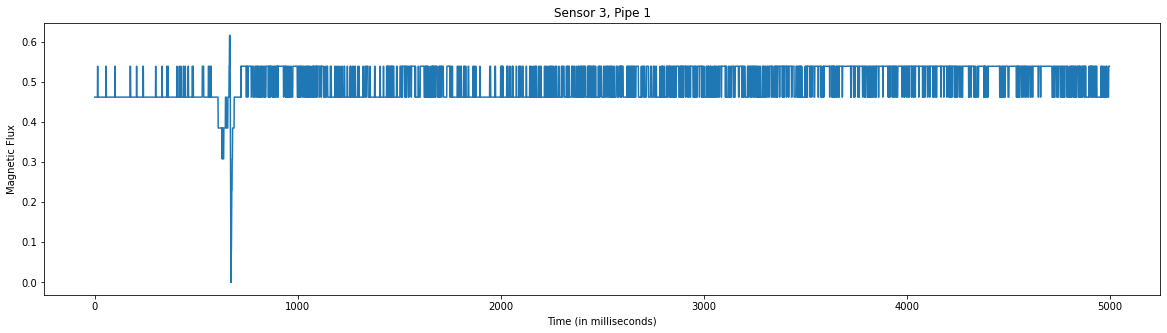

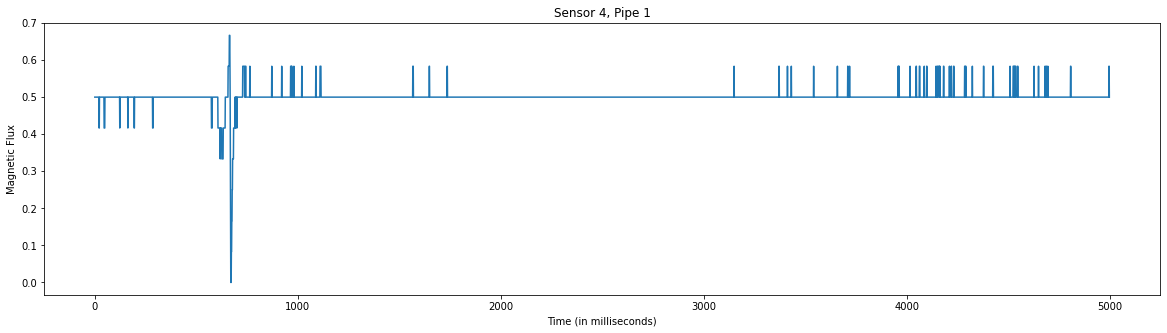

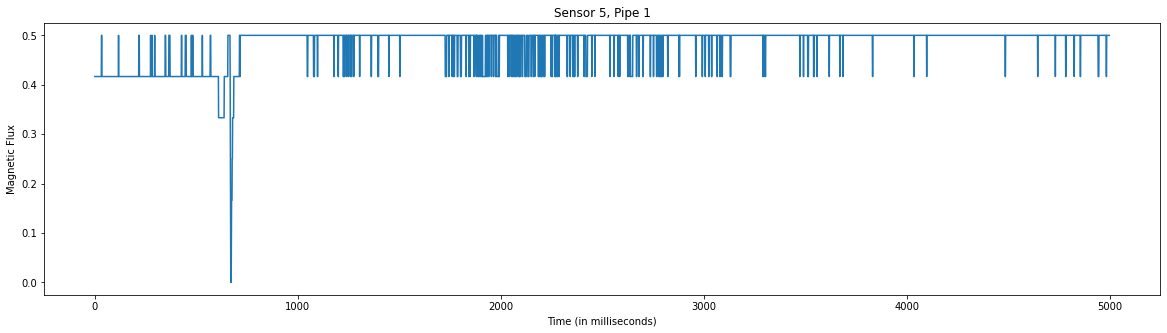

In [5]:
# Let's visualise sensor 3,4,5 for pipe 1
for sensor in range(3,6):
    plot_sensor_pipe(data=scaled_data, sensor=sensor, pipe_no=1)

#### Observation:
- Looking at these and many more samples from different pipes, for every pipe, there's a fluctuation of data at the same time period.

#### Inference:
- This can be the joint of pipes where wielding is performed. This is the place where there is maximum magnetic fluctuations picked up by the sensors.

#### Furthur Steps:
- Find the wielding positions for all the pipes in the pipeline

In [6]:
# Sum up all the sensors data, so that error gets magnified the position where wieldings occur
converged_signal = pd.DataFrame(scaled_data.sum(axis=1))
converged_signal

,0
0,41.664353
1,41.832185
2,41.558737
3,41.669806
4,41.352828
...,...
49995,41.353721
49996,41.739435
49997,41.722768
49998,41.693783


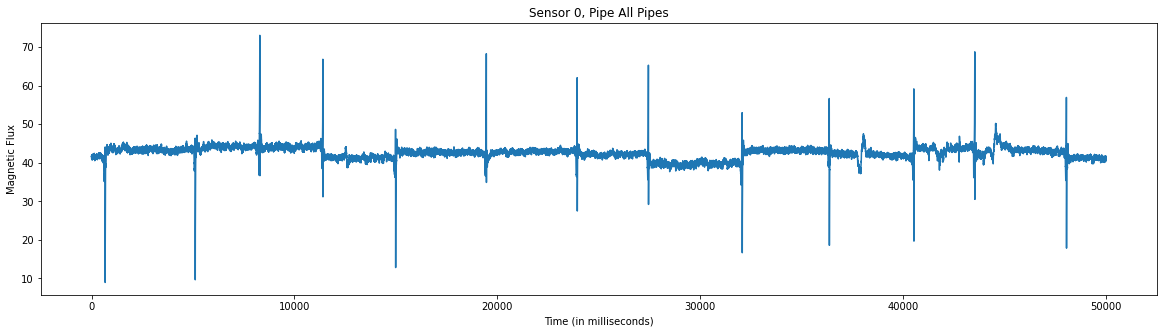

In [7]:
# Now we can visualise all the positins where wielding is observed
plot_sensor_pipe(data=converged_signal, sensor=0, pipe_no=-1)

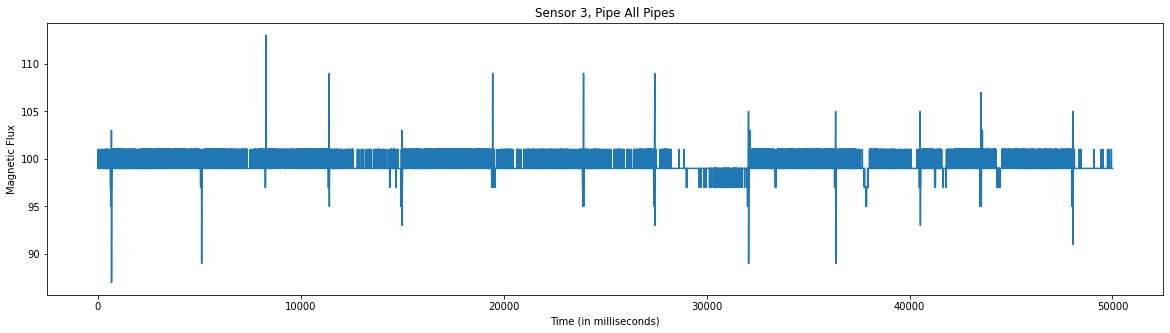

In [8]:
# Confirming initial hypothesis of converging signal does not lead to information loss
plot_sensor_pipe(data=data, sensor=3, pipe_no=-1)

Wohooo...

#### Observation:
- Both the signal pattern matches, so let's detect the **`POSITION OF ANAMOLIES`** with the converged signal

#### Steps:
We can try finding outliers/anamolies with many approaches,

1. InterQuartile Range
2. Z-score
3. Image Visualisation

In [9]:
# Visualise the which method will be suitable: IQR or Z-score
def plot_iqr_z(data, sensor:int, pipe_no:int):
    
    pipe_end = pipe_no * 5_000
    pipe_start = pipe_end - 5_000

    # Gauss Range for current pipe
    Q1 = data.loc[pipe_start:pipe_end,sensor].quantile(0.25)
    Q3 = data.loc[pipe_start:pipe_end,sensor].quantile(0.75)
    IQR = Q3-Q1

    lower_gauss = Q1 - 1.5*IQR
    upper_gauss = Q3 + 1.5*IQR

    # Z-score range
    pipe_mean = data[sensor][pipe_start:pipe_end].mean()
    pipe_std = data[sensor][pipe_start:pipe_end].std()

    lower_zscore = pipe_mean - 3*pipe_std
    upper_zscore = pipe_mean + 3*pipe_std

    # Plot
    plt.figure(figsize=(20,5))
    plt.title(f'Sensor {sensor}, Pipe {pipe_no}')
    plt.xlabel('Time (in milliseconds)')
    plt.ylabel('Magnetic Flux')

    # gauss line
    plt.axhline(upper_gauss, c = 'red')
    plt.axhline(lower_gauss, c = 'red')

    # zscore line
    plt.axhline(lower_zscore, c = 'black')
    plt.axhline(upper_zscore, c = 'black')
    
    plt.plot(data.iloc[pipe_start:pipe_end,sensor]);

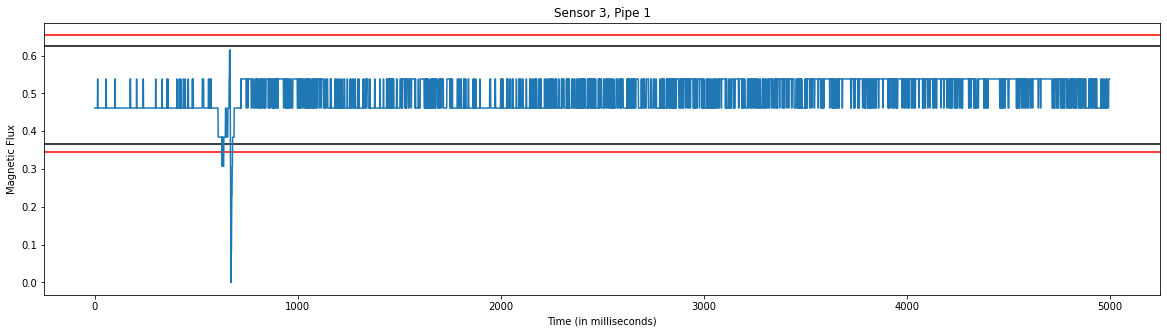

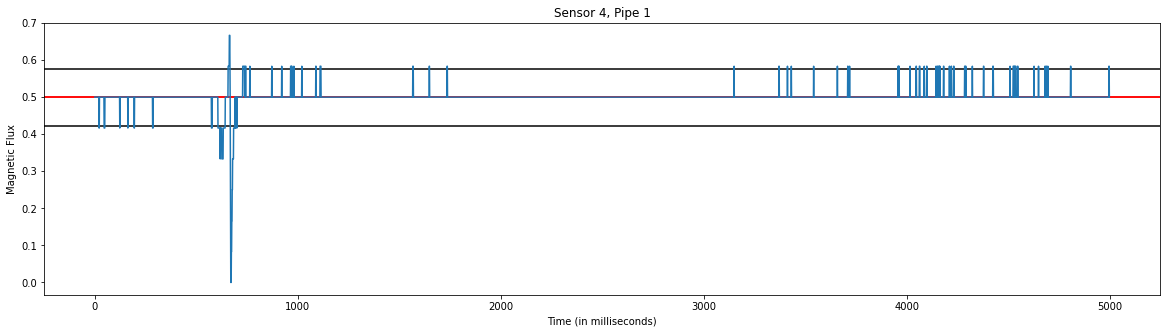

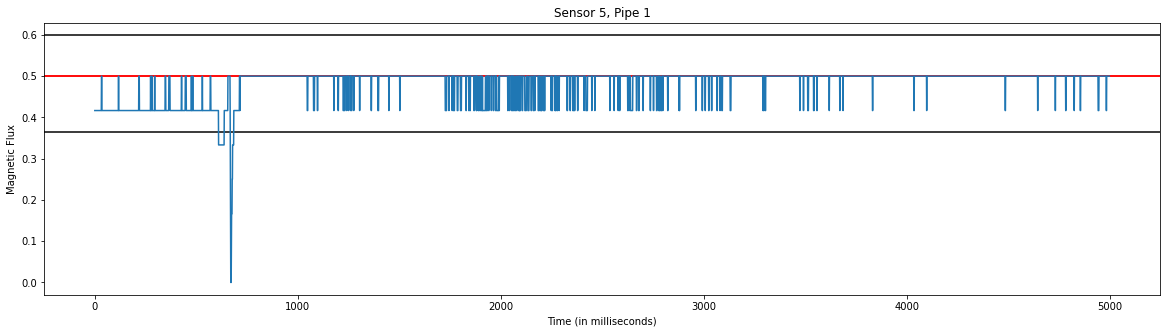

In [10]:
for sensor in range(3,6):
    plot_iqr_z(data=scaled_data, sensor=sensor, pipe_no=1)

#### Observation:
1. Gauss range might fall in the mean of the sensor data
2. Z-score range always gets the correct differentiation for anamoly data

We'll use Z-score method

### Final Cleaning and Producting Report
Steps:

1. Find z-score distribution for each pipe
2. Get abnormalities outside the optimum range(lower and higher) of Z-score
3. Clean the positions
4. Produce a report

In [11]:
from collections import defaultdict

def analysis(df ,sensor=0, pipe_length=5_000):
    '''
    
    --------------
    df    :       dataframe containing sensor
    sensor:       int 
    pipe_length:  int (in seconds)
    --------------
    '''
    
    start_stop = {}
    pipe_start = 0
    report = defaultdict(list)
    no_of_pipes = len(df[sensor])//pipe_length
    
    for pipe_no in range(no_of_pipes):
        
        pipe_end = pipe_start+pipe_length
        pipe = df[pipe_start:pipe_end][sensor]
        pipe_start += pipe_length
        
        # z-score
        mean = pipe.mean()
        std = pipe.std()
        
        lower_lim = mean - 3*std
        upper_lim = mean + 3*std
        
        outlier_indices = pipe[ (pipe<lower_lim) | (pipe>upper_lim) ].index.values
        
        # Clean outliers
        start_stop_dict = dict()
        outlier_start=outlier_stop=0
        
        for index, current_indice in enumerate(outlier_indices):
            
            if index >= len(outlier_indices)-2:
                outlier_stop = index+1
                start_stop_dict[outlier_start] = outlier_stop
                break
            else:
                if (abs(current_indice - outlier_indices[index+1]) > 10):
                    outlier_stop = index
                    start_stop_dict[outlier_start] = outlier_stop
                    outlier_start = index+1
        
        # Assign median values to contineous values using dict
        for outlier_start, outlier_stop in start_stop_dict.items():
            med = np.median(outlier_indices[outlier_start:outlier_stop]) if outlier_start!=outlier_stop else outlier_indices[outlier_start]
            report[pipe_no].append(int(med))
    return report

In [12]:
from pprint import pprint

outlier_report = analysis(df=converged_signal, sensor=0, pipe_length=5_000)
pprint(outlier_report,width=100)

defaultdict(<class 'list'>,
            {0: [624, 678],
             1: [5070, 5117, 8252, 8286],
             2: [11397, 14990],
             3: [15001, 19414, 19450, 19502],
             4: [23892, 23933],
             5: [27410, 27441],
             6: [32018, 32069],
             7: [36361, 37817, 37873, 37899, 38040],
             8: [40491, 40527, 43474, 43525, 44560],
             9: [48007, 48048]})


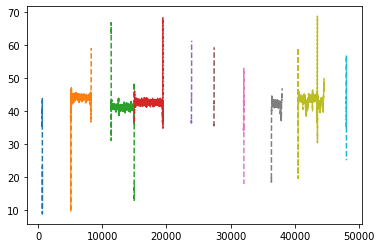

In [13]:
# Check the accuracy of analysis, consider only end lines
for pipe, outliers in outlier_report.items():
    converged_signal[0][outliers[0]:outliers[-1]].plot(kind='line', style='--')

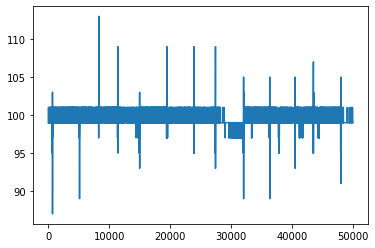

In [14]:
# Cross check with other sensor
data[3].plot();

### Conclusion:
- We have successfully been able to identify the positions in pipe where the anamolies occur

In [15]:
# Convert the Report into a DataFrame
resultant_df = pd.DataFrame(columns=['Pipe Number','Outlier Position'])

position = 0
for pipe_no, outlier_list in outlier_report.items():
    for outlier in outlier_list:
        resultant_df.loc[position] = [pipe_no,outlier]
        position += 1

In [16]:
resultant_df

,Pipe Number,Outlier Position
0,0,624
1,0,678
2,1,5070
3,1,5117
4,1,8252
5,1,8286
6,2,11397
7,2,14990
8,3,15001
9,3,19414
